# Task  1 : Stock Prediction 

<img src="stock.jpg" title="STOCK MARKET">

# Importing the Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Reading the Dataset

In [7]:
tg = pd.read_csv("NSE-TATAGLOBAL11.csv")

In [9]:
tg.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


# Sorting The Data

Checking for null Values

In [10]:
NAN = [(c, tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [11]:
srt=tg.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [12]:
srt.reset_index(inplace=True)

In [13]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


# Visualization of Data


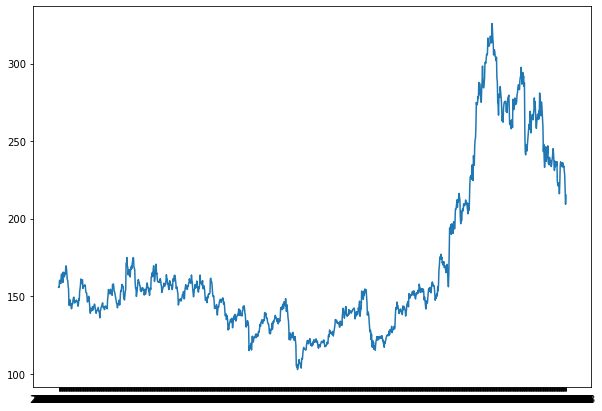

In [14]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [15]:
close_srt = srt['Close']
close_srt

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

# Feature Scaling


close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

In [19]:
Since LSTM are sensitive to scale data, so we apply MinMax Scaler

SyntaxError: invalid syntax (885054160.py, line 1)

# Splitting of  data

In [20]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [21]:
train_data.shape

(864, 1)

In [22]:
test_dat

(371, 1)

# Convet an array of value into a dataset

In [34]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX), np.array(dataY)   
                     

# Reshaping of dataset

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [40]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [41]:
X_train

array([[[0.23823398],
        [0.2371134 ],
        [0.25773196],
        ...,
        [0.17279247],
        [0.16651726],
        [0.16606903]],

       [[0.2371134 ],
        [0.25773196],
        [0.25728373],
        ...,
        [0.16651726],
        [0.16606903],
        [0.14926042]],

       [[0.25773196],
        [0.25728373],
        [0.25459435],
        ...,
        [0.16606903],
        [0.14926042],
        [0.16920663]],

       ...,

       [[0.08628418],
        [0.10197221],
        [0.07171672],
        ...,
        [0.21290901],
        [0.21470193],
        [0.22075303]],

       [[0.10197221],
        [0.07171672],
        [0.06432093],
        ...,
        [0.21470193],
        [0.22075303],
        [0.22411475]],

       [[0.07171672],
        [0.06432093],
        [0.0835948 ],
        ...,
        [0.22075303],
        [0.22411475],
        [0.22590766]]])

In [42]:
X_test

array([[[0.22747647],
        [0.22008068],
        [0.21447781],
        ...,
        [0.42738682],
        [0.4255939 ],
        [0.40632004]],

       [[0.22008068],
        [0.21447781],
        [0.2097714 ],
        ...,
        [0.4255939 ],
        [0.40632004],
        [0.42155984]],

       [[0.21447781],
        [0.2097714 ],
        [0.20394442],
        ...,
        [0.40632004],
        [0.42155984],
        [0.46302107]],

       ...,

       [[0.84872255],
        [0.81846706],
        [0.82855222],
        ...,
        [0.58538772],
        [0.58762887],
        [0.57485433]],

       [[0.81846706],
        [0.82855222],
        [0.6869117 ],
        ...,
        [0.58762887],
        [0.57485433],
        [0.56006275]],

       [[0.82855222],
        [0.6869117 ],
        [0.62752129],
        ...,
        [0.57485433],
        [0.56006275],
        [0.51792918]]])

# Creating the LSTM Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Predicition and Checking Performance

In [46]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 9s 280ms/step - loss: 0.0074 - val_loss: 0.0015
Epoch 2/60
11/11 [==============================] - 2s 156ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 3/60
11/11 [==============================] - 2s 145ms/step - loss: 0.0018 - val_loss: 6.5436e-04
Epoch 4/60
11/11 [==============================] - 2s 161ms/step - loss: 0.0012 - val_loss: 8.2370e-04
Epoch 5/60
11/11 [==============================] - 2s 159ms/step - loss: 0.0011 - val_loss: 7.6207e-04
Epoch 6/60
11/11 [==============================] - 2s 158ms/step - loss: 0.0010 - val_loss: 7.7905e-04
Epoch 7/60
11/11 [==============================] - 2s 172ms/step - loss: 9.6353e-04 - val_loss: 7.2906e-04
Epoch 8/60
11/11 [==============================] - 2s 163ms/step - loss: 9.2990e-04 - val_loss: 5.8053e-04
Epoch 9/60
11/11 [==============================] - 2s 159ms/step - loss: 9.1260e-04 - val_loss: 7.2361e-04
Epoch 10/60
11/11 [==============================] - 2s 196m

In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 31ms/step


# calculating the performance

In [48]:
import math
from sklearn.metrics import mean_squared_error

In [49]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.016627620197684375

In [54]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.036153591301116714

<function matplotlib.pyplot.show(close=None, block=None)>

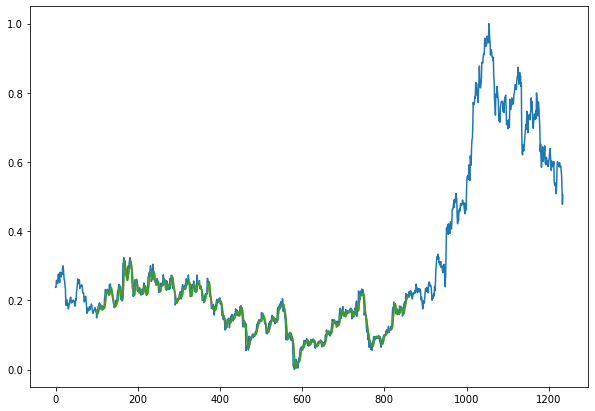

In [57]:
look_back=100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot  = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:] = test_predict
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(trainPredictPlot)
plt.show

# prediction for next 30 days

In [58]:
len(test_data)

371

In [59]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 0)

In [60]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [62]:
day_new =np.arange(1,101)
day_pred = np.arange(101,131)

In [63]:
len(close_srt)

1235

ValueError: x and y must have same first dimension, but have shapes (100,) and (1216, 1)

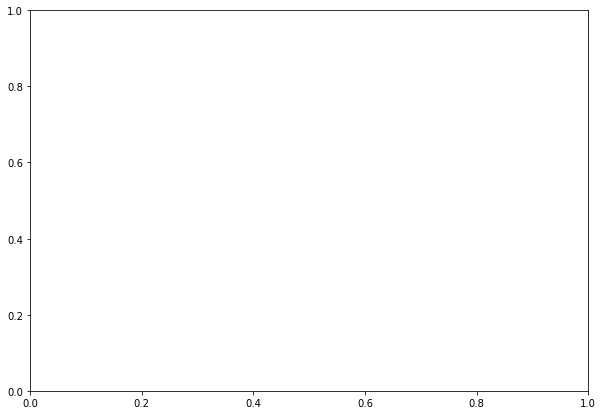

In [68]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[19:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))